## Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization


## Load Data


In [3]:
high_altitude = pd.read_csv("./data/measurements-high-altitude.csv")
low_altitude = pd.read_csv("./data/measurements-low-altitude.csv")


## Data cleanup


In [4]:
list(high_altitude)


['hour',
 ' minute',
 ' second',
 ' azimuth angle (relative to west=0)/degree',
 ' elevation angle/degree',
 ' power/mW']

In [5]:
high_altitude.rename(columns={" power/mW": "power", " azimuth angle (relative to west=0)/degree": "azimuth", " elevation angle/degree": "elevation"}, inplace=True)
high_altitude.columns = high_altitude.columns.str.replace(" ", "")

low_altitude.rename(columns={" power/mW": "power", " azimuth angle (relative to west=0)/degree": "azimuth", " elevation angle/degree": "elevation"}, inplace=True)
low_altitude.columns = low_altitude.columns.str.replace(" ", "")


In [6]:
high_altitude.head()


,hour,minute,second,azimuth,elevation,power
0,9,45,5,0,0,32
1,9,45,9,0,15,879
2,9,45,12,0,30,34
3,9,45,15,0,45,35
4,9,45,18,0,60,51


In [7]:
low_altitude.head()


,hour,minute,second,azimuth,elevation,power
0,10,38,3,0,0,56
1,10,38,7,0,15,57
2,10,38,10,0,30,59
3,10,38,14,0,45,57
4,10,38,16,0,60,83


In [8]:
high_altitude.describe()


,hour,minute,second,azimuth,elevation,power
count,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,11.735925,29.474281,29.589307,89.467801,45.006075,231.443904
std,1.498760,17.265160,17.289971,57.050976,30.037962,175.365305
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,15.000000,15.000000,36.000000,15.000000,129.000000
50%,12.000000,30.000000,30.000000,90.000000,45.000000,217.000000
75%,13.000000,45.000000,45.000000,144.000000,75.000000,333.000000
max,14.000000,59.000000,59.000000,180.000000,90.000000,4168.000000


In [9]:
high_altitude.loc[high_altitude.power.idxmax(), :]


hour            9
minute         45
second         38
azimuth        18
elevation      45
power        4168
Name: 10, dtype: int64

In [10]:
low_altitude.describe()


,hour,minute,second,azimuth,elevation,power
count,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000
mean,11.880294,30.643139,29.224732,90.000000,45.000000,279.383399
std,1.090955,18.001482,17.335092,56.937075,30.008473,82.632597
min,10.000000,0.000000,0.000000,0.000000,0.000000,41.000000
25%,11.000000,14.000000,14.000000,36.000000,15.000000,225.000000
50%,12.000000,32.000000,29.000000,90.000000,45.000000,302.000000
75%,13.000000,47.000000,44.000000,144.000000,75.000000,352.000000
max,14.000000,59.000000,59.000000,180.000000,90.000000,378.000000


## Convert time in datetime


In [11]:
df = high_altitude.loc[:, ["hour", "minute", "second"]]
l = len(high_altitude)
df["year"] = [2016] * l
df["month"] = [11] * l
df["day"] = [23] * l

high_altitude = high_altitude.set_index(pd.to_datetime(df))
high_altitude


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,9,45,5,0,0,32
2016-11-23 09:45:09,9,45,9,0,15,879
2016-11-23 09:45:12,9,45,12,0,30,34
2016-11-23 09:45:15,9,45,15,0,45,35
2016-11-23 09:45:18,9,45,18,0,60,51
...,...,...,...,...,...,...
2016-11-23 14:46:27,14,46,27,36,90,172
2016-11-23 14:46:30,14,46,30,54,0,108
2016-11-23 14:46:35,14,46,35,54,15,159
2016-11-23 14:46:38,14,46,38,54,30,213


In [12]:
df = low_altitude.loc[:, ["hour", "minute", "second"]]
l = len(low_altitude)
df["year"] = [2016] * l
df["month"] = [11] * l
df["day"] = [23] * l

low_altitude = low_altitude.set_index(pd.to_datetime(df))
low_altitude


,hour,minute,second,azimuth,elevation,power
2016-11-23 10:38:03,10,38,3,0,0,56
2016-11-23 10:38:07,10,38,7,0,15,57
2016-11-23 10:38:10,10,38,10,0,30,59
2016-11-23 10:38:14,10,38,14,0,45,57
2016-11-23 10:38:16,10,38,16,0,60,83
...,...,...,...,...,...,...
2016-11-23 14:09:04,14,9,4,180,30,278
2016-11-23 14:09:07,14,9,7,180,45,281
2016-11-23 14:09:10,14,9,10,180,60,274
2016-11-23 14:09:13,14,9,13,180,75,253


### Removing outliers from high_altitude


In [13]:
print(high_altitude.shape)
high_altitude = high_altitude[(np.abs(stats.zscore(high_altitude)) < 3).all(axis=1)]
print(high_altitude.shape)


(2469, 6)
(2459, 6)


In [14]:
high_altitude


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,9,45,5,0,0,32
2016-11-23 09:45:12,9,45,12,0,30,34
2016-11-23 09:45:15,9,45,15,0,45,35
2016-11-23 09:45:18,9,45,18,0,60,51
2016-11-23 09:45:21,9,45,21,0,75,76
...,...,...,...,...,...,...
2016-11-23 14:46:27,14,46,27,36,90,172
2016-11-23 14:46:30,14,46,30,54,0,108
2016-11-23 14:46:35,14,46,35,54,15,159
2016-11-23 14:46:38,14,46,38,54,30,213


### Plots


<AxesSubplot:title={'center':'High Altitude Peak Power Measurements'}>

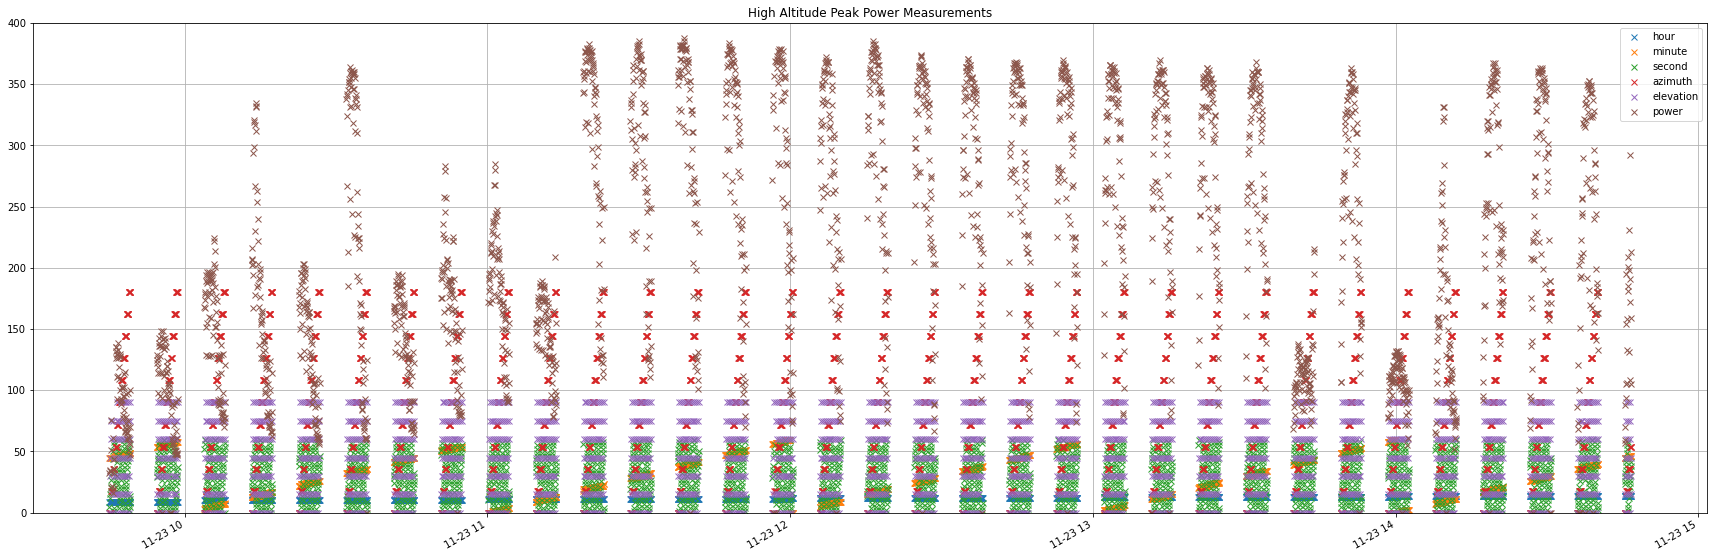

In [15]:
high_altitude.plot(figsize=(30, 10), title="High Altitude Peak Power Measurements", grid=True, marker="x", markersize=6, linestyle="None", ylim=(0, 400))


<AxesSubplot:title={'center':'Low Altitude Peak Power Measurements'}>

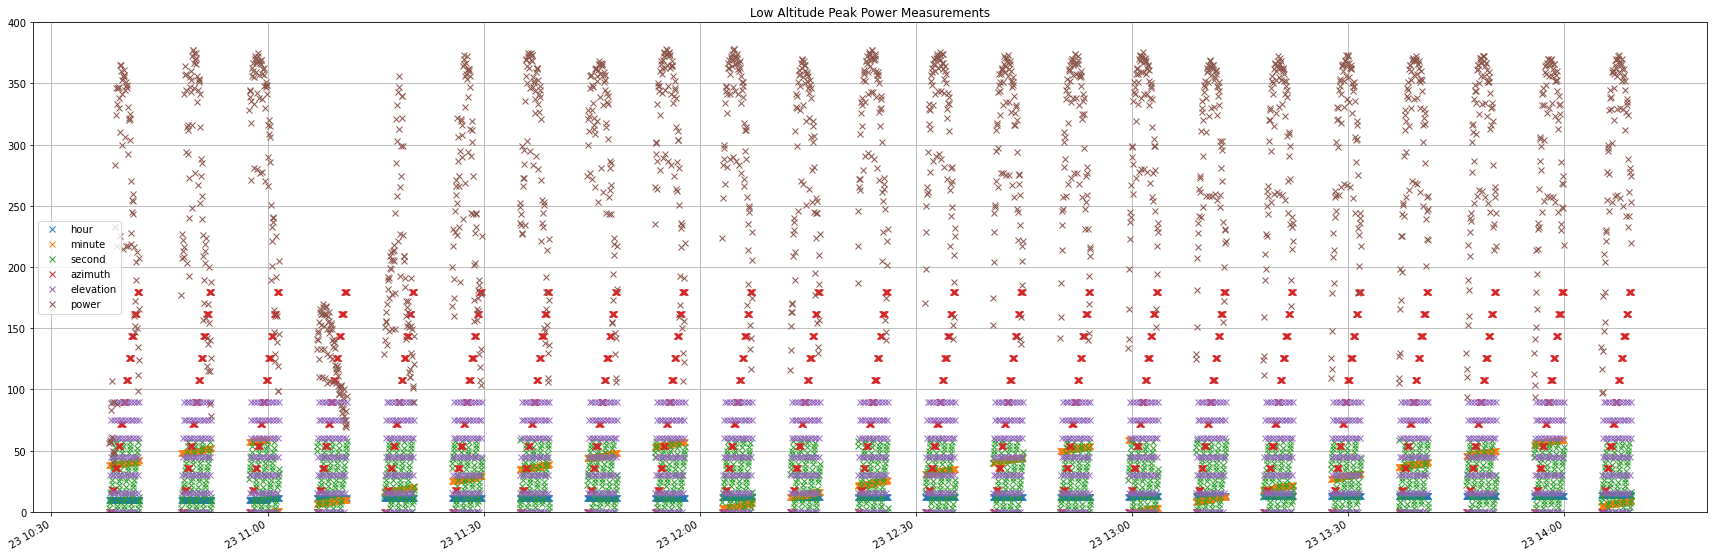

In [16]:
low_altitude.plot(figsize=(30, 10), title="Low Altitude Peak Power Measurements", grid=True, marker="x", markersize=6, linestyle="None", ylim=(0, 400))


## Train test split


In [215]:
X_low_train = low_altitude.sample(frac=0.8, random_state=2)
X_low_test = low_altitude.drop(X_low_train.index)

y_low_train = X_low_train.pop("power")
y_low_test = X_low_test.pop("power")


In [216]:
X_high_train = high_altitude.sample(frac=0.8, random_state=2)
X_high_test = high_altitude.drop(X_high_train.index)

y_high_train = X_high_train.pop("power")
y_high_test = X_high_test.pop("power")


In [217]:
y_low_train.describe()


count    1417.000000
mean      279.540579
std        82.386542
min        49.000000
25%       227.000000
50%       301.000000
75%       351.000000
max       378.000000
Name: power, dtype: float64

In [218]:
y_high_train.describe()


count    1967.000000
mean      224.564311
std       104.227067
min         0.000000
25%       129.000000
50%       216.000000
75%       333.000000
max       388.000000
Name: power, dtype: float64

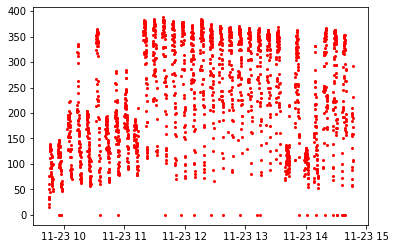

In [219]:
plt.plot(y_high_train, "or", markersize=2)


In [220]:
normalizer_low = Normalization(axis=-1)
normalizer_low.adapt(np.array(X_low_train))

print(normalizer_low.mean.numpy())


[[11.871558 30.616798 29.044462 88.81864  45.719826]]


2022-07-13 12:37:47.413701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-13 12:37:47.431013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [221]:
first_sample = np.array(X_low_train[:1])

with np.printoptions(precision=2, suppress=True):
    print(np.sort(first_sample))
    print(np.sort(normalizer_low(first_sample).numpy()))


[[ 0 11 15 26 44]]
[[-1.56 -1.02 -0.8  -0.18  0.74]]


# Baseline Dataset


## Regression using MLP


In [222]:
def create_regressor(normalizer):
    reg = Sequential([normalizer, Dense(units=256, activation="relu"), Dropout(0.3), Dense(units=128, activation="relu"), Dense(units=1)])

    return reg


In [223]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-10, verbose=1), tf.keras.callbacks.EarlyStopping(patience=30)]
metrics = [tf.keras.metrics.MeanSquaredError()]


In [224]:
def plot_metrics(history):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_title("loss (MAE)")
    ax1.set_xlabel("epochs")
    ax1.set_ylabel("error")
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history["mean_squared_error"], label="mse")
    ax2.plot(history.history["val_mean_squared_error"], label="val_mse")
    ax2.set_title("metric (MSE)")
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("error")
    ax2.legend()
    ax2.grid(True)


### Regression on Low Altitude


In [225]:
reg_low = create_regressor(normalizer_low)
reg_low.predict(X_low_train[:10])


2022-07-13 12:37:50.363513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[-0.02599659],
       [-0.15872976],
       [-0.11335038],
       [-0.14400779],
       [-0.18299127],
       [-0.14572747],
       [-0.02561549],
       [-0.04619619],
       [-0.2750776 ],
       [-0.17461883]], dtype=float32)

In [226]:
reg_low.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 256)               1536      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,572
Trainable params: 34,561
Non-trainable params: 11
_________________________________________________

In [227]:
reg_low.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mae", metrics=metrics)


In [228]:
history = reg_low.fit(X_low_train, y_low_train, epochs=1000, validation_split=0.2, callbacks=callbacks)


Epoch 1/1000
 8/36 [=====>........................] - ETA: 0s - loss: 161.0935 - mean_squared_error: 37352.7461

2022-07-13 12:37:53.056869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 11ms/step - loss: 117.1120 - mean_squared_error: 21305.0859 - val_loss: 75.0527 - val_mean_squared_error: 8123.0210 - lr: 0.1000
Epoch 2/1000
18/36 [==============>...............] - ETA: 0s - loss: 75.2562 - mean_squared_error: 8798.2715

2022-07-13 12:37:53.526708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 0s 8ms/step - loss: 71.2829 - mean_squared_error: 8010.8110 - val_loss: 53.2953 - val_mean_squared_error: 4575.2085 - lr: 0.1000
Epoch 3/1000
36/36 [==============================] - 0s 7ms/step - loss: 63.2676 - mean_squared_error: 6219.9873 - val_loss: 81.9939 - val_mean_squared_error: 9134.8701 - lr: 0.1000
Epoch 4/1000
36/36 [==============================] - 0s 7ms/step - loss: 66.0246 - mean_squared_error: 6807.2783 - val_loss: 52.6458 - val_mean_squared_error: 4150.2490 - lr: 0.1000
Epoch 5/1000
36/36 [==============================] - 0s 7ms/step - loss: 42.7475 - mean_squared_error: 3154.1482 - val_loss: 38.3097 - val_mean_squared_error: 2301.3206 - lr: 0.1000
Epoch 6/1000
36/36 [==============================] - 0s 7ms/step - loss: 39.0998 - mean_squared_error: 2849.6577 - val_loss: 35.7488 - val_mean_squared_error: 2215.3948 - lr: 0.1000
Epoch 7/1000
36/36 [==============================] - 0s 7ms/step - loss: 37.3142 - mean_squared_e

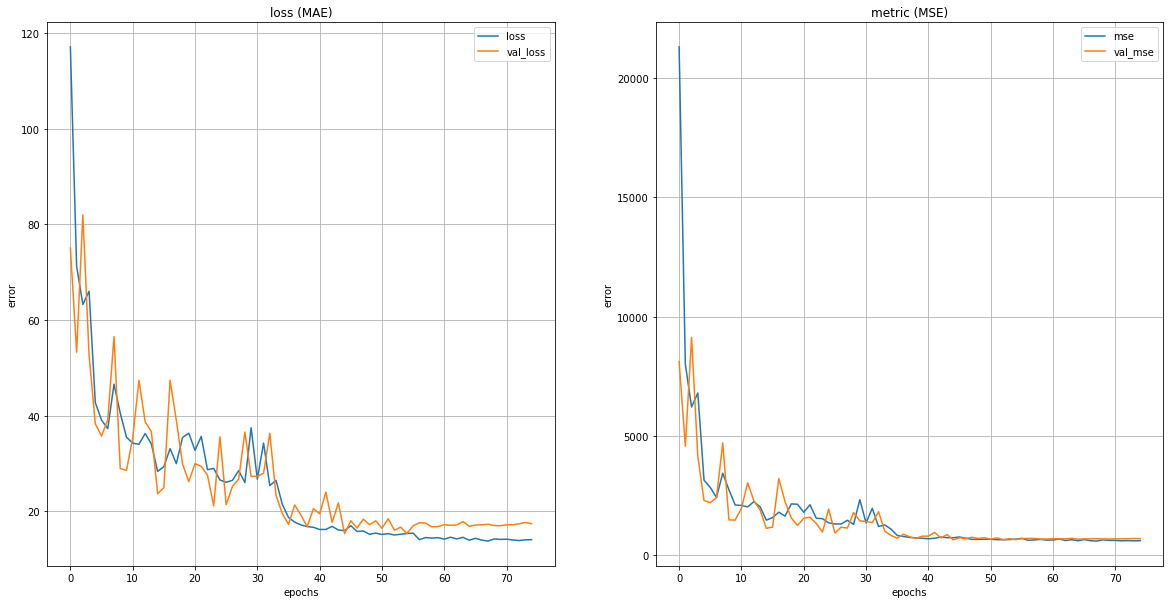

In [229]:
plot_metrics(history)


In [230]:
results = reg_low.evaluate(X_low_test, y_low_test)


12/12 [==============================] - 0s 6ms/step - loss: 17.1168 - mean_squared_error: 676.6713


### Regression on High Altitude


In [231]:
normalizer_high = Normalization(axis=-1)
normalizer_high.adapt(np.array(X_high_train))

print(normalizer_high.mean.numpy())


[[11.747841 29.50585  29.623283 89.49671  45.289783]]


2022-07-13 12:38:15.463653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-13 12:38:15.476491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [232]:
first_sample = np.array(X_high_train[:1])

with np.printoptions(precision=2, suppress=True):
    print(np.sort(first_sample))
    print(np.sort(normalizer_high(first_sample).numpy()))


[[ 11  15  40  50 144]]
[[-1.01 -0.5   0.61  0.96  1.17]]


In [233]:
reg_high = create_regressor(normalizer_high)
reg_high.predict(X_high_train[:10])


2022-07-13 12:38:15.752132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ 0.16473705],
       [-0.09207121],
       [-0.06952302],
       [-0.06206061],
       [-0.01725299],
       [-0.17061502],
       [-0.01162244],
       [-0.14067888],
       [-0.05234892],
       [-0.11011789]], dtype=float32)

In [234]:
reg_high.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 256)               1536      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,572
Trainable params: 34,561
Non-trainable params: 11
_________________________________________________

In [235]:
reg_high.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mae", metrics=metrics)


In [236]:
history = reg_high.fit(X_high_train, y_high_train, epochs=1000, validation_split=0.2, callbacks=callbacks)


Epoch 1/1000
 9/50 [====>.........................] - ETA: 0s - loss: 139.6201 - mean_squared_error: 13811.7471

2022-07-13 12:38:16.013445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 9ms/step - loss: 100.0452 - mean_squared_error: 13603.8760 - val_loss: 81.6687 - val_mean_squared_error: 10054.9453 - lr: 0.1000
Epoch 2/1000
11/50 [=====>........................] - ETA: 0s - loss: 83.2850 - mean_squared_error: 11074.8232

2022-07-13 12:38:16.478563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 0s 7ms/step - loss: 70.9083 - mean_squared_error: 8410.2666 - val_loss: 54.5492 - val_mean_squared_error: 4870.9946 - lr: 0.1000
Epoch 3/1000
50/50 [==============================] - 0s 7ms/step - loss: 61.3841 - mean_squared_error: 6639.6802 - val_loss: 60.2841 - val_mean_squared_error: 5622.7002 - lr: 0.1000
Epoch 4/1000
50/50 [==============================] - 0s 7ms/step - loss: 59.5985 - mean_squared_error: 6057.7476 - val_loss: 49.1491 - val_mean_squared_error: 4522.9648 - lr: 0.1000
Epoch 5/1000
50/50 [==============================] - 0s 7ms/step - loss: 55.0937 - mean_squared_error: 5513.1030 - val_loss: 72.9399 - val_mean_squared_error: 8206.8477 - lr: 0.1000
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 52.8314 - mean_squared_error: 5273.1567 - val_loss: 77.3808 - val_mean_squared_error: 10360.3281 - lr: 0.1000
Epoch 7/1000
50/50 [==============================] - 0s 7ms/step - loss: 65.6777 - mean_squared_

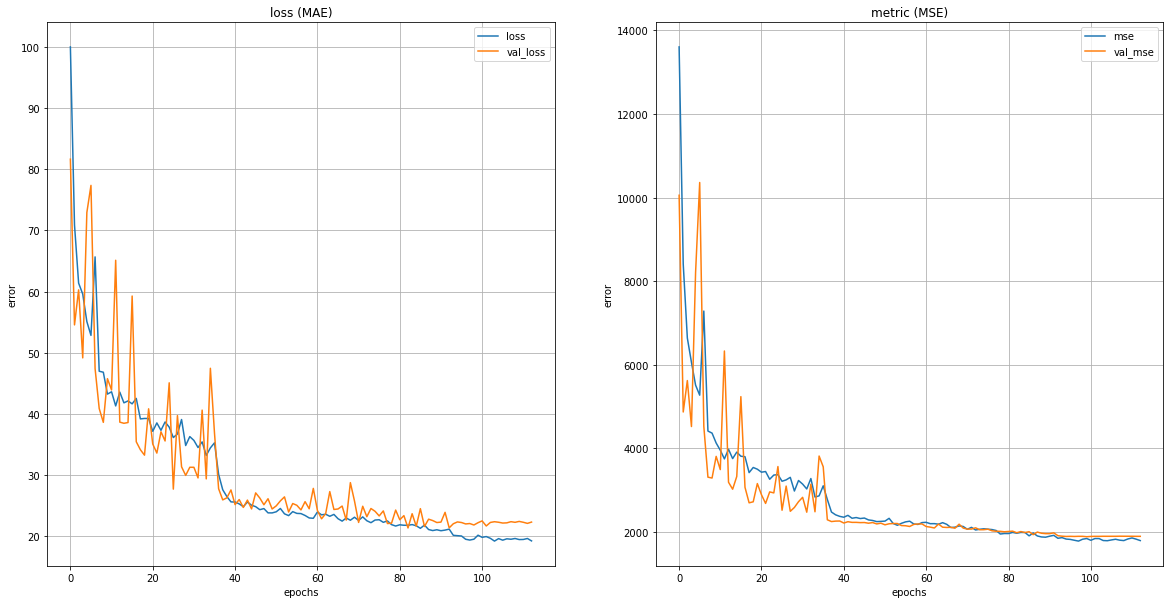

In [237]:
plot_metrics(history)


In [238]:
results = reg_high.evaluate(X_high_test, y_high_test)


16/16 [==============================] - 0s 6ms/step - loss: 22.4423 - mean_squared_error: 1925.1620


## Timeseries Forecasting


✅ Resampled existing dataset but creates NaNs. Rolled back to original dataset

✅ Split dataset in multivariate time series

✅ Trained LSTM

ToDo:
Forecast LSTM predictions untill 20:00

Alternative 1:

- Manually create time, azimuth and elevation vectors for hour range 14:40 - 20:00
- Use LSTM to predict power given the manually created features

Alternative 2:

- Train LSTM to predict azimuth and elevation as well as power
- Recursively predict on LSTM predictions till 20:00


<AxesSubplot:title={'center':'High altitude'}>

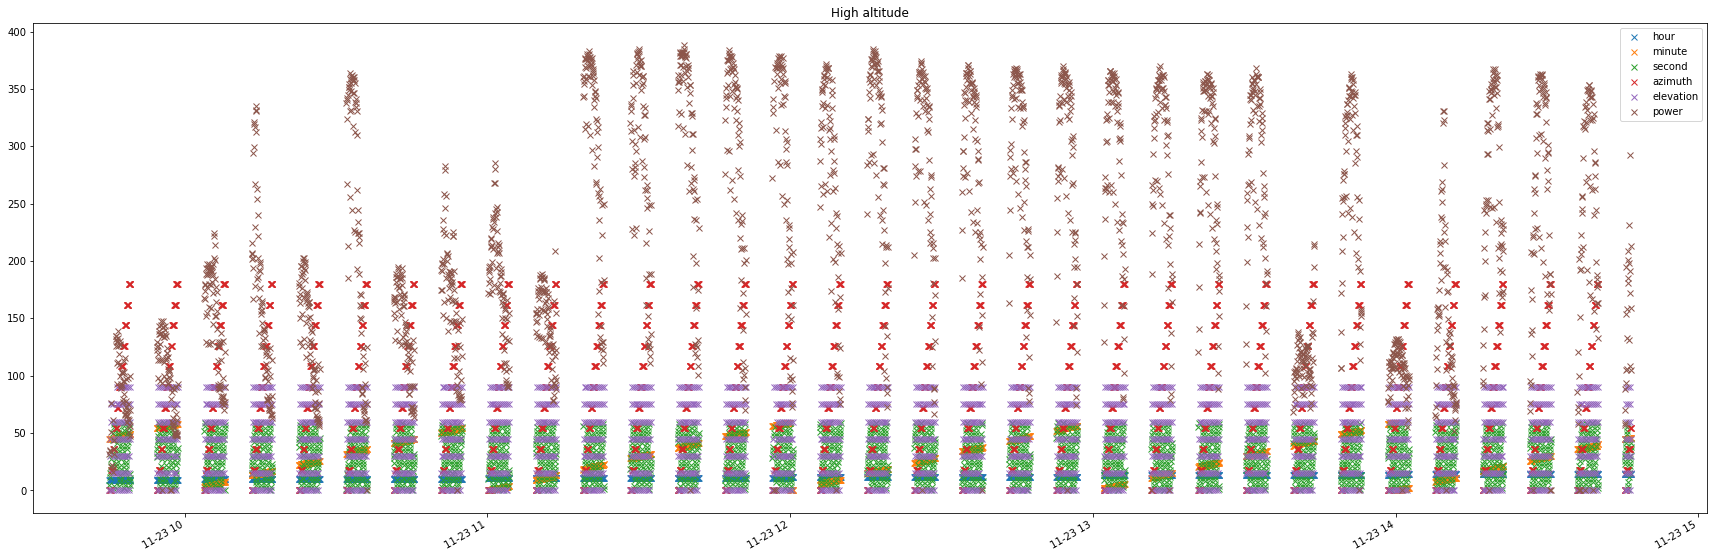

In [17]:
high_altitude.plot(figsize=(30, 10), title="High altitude", marker="x", linestyle="None")


In [18]:
# high_altitude_resampled = high_altitude.resample('20S').ffill()
# print(high_altitude_resampled)
# high_altitude_resampled.plot(figsize=(30,10), title='High altitude resampled', marker='x', linestyle='None')


In [19]:
def normalize(df):
    df_std = df.copy()
    for column in df_std.columns[:-1]:
        df_std[column] = df_std[column] / df_std[column].max()
    return df_std


In [20]:
high_altitude_norm = normalize(high_altitude)


In [21]:
high_altitude_norm[high_altitude_norm.isna().any(axis=1)]


,hour,minute,second,azimuth,elevation,power


In [22]:
high_altitude_norm.describe()


,hour,minute,second,azimuth,elevation,power
count,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,0.839075,0.498466,0.501623,0.498455,0.499458,224.354209
std,0.106542,0.292716,0.293077,0.316725,0.333502,104.092988
min,0.642857,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.785714,0.237288,0.254237,0.200000,0.166667,129.000000
50%,0.857143,0.508475,0.508475,0.500000,0.500000,216.000000
75%,0.928571,0.762712,0.762712,0.800000,0.833333,333.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,388.000000


In [23]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i : i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size][-1]
        y.append(label)
    return np.array(X), np.array(y)


In [24]:
X, y = df_to_X_y(high_altitude)
X.shape, y.shape


((2454, 5, 6), (2454,))

In [25]:
X[0]


array([[ 9, 45,  5,  0,  0, 32],
       [ 9, 45, 12,  0, 30, 34],
       [ 9, 45, 15,  0, 45, 35],
       [ 9, 45, 18,  0, 60, 51],
       [ 9, 45, 21,  0, 75, 76]])

In [26]:
y


array([ 20,  22,  61, ..., 159, 213, 105])

In [174]:
df_len = high_altitude.shape[0]
train = int(df_len * 0.7)
val = int(df_len * 0.9)
X_train, y_train = X[:train], y[:train]
X_val, y_val = X[train:val], y[train:val]
X_test, y_test = X[val:], y[val:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((1721, 5, 6), (1721,), (492, 5, 6), (492,), (241, 5, 6), (241,))

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(InputLayer((5, 6)))
model.add(LSTM(64))
model.add(Dense(8, "relu"))
model.add(Dense(1, "linear"))

model.summary()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-13 12:31:49.232088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-13 12:31:49.233579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [176]:
optimizer = optimizers.Adam()
model.compile(loss="mae", optimizer=optimizer)


In [177]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)


Epoch 1/200


2022-07-13 12:31:50.430736: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-13 12:31:50.909190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-13 12:31:51.092762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 6/54 [==>...........................] - ETA: 0s - loss: 229.8508 

2022-07-13 12:31:51.229066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - ETA: 0s - loss: 227.1826

2022-07-13 12:31:52.235958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-13 12:31:52.303641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 2s 22ms/step - loss: 227.1826 - val_loss: 197.5778
Epoch 2/200
54/54 [==============================] - 1s 10ms/step - loss: 221.4819 - val_loss: 190.3621
Epoch 3/200
54/54 [==============================] - 1s 12ms/step - loss: 213.7586 - val_loss: 181.4905
Epoch 4/200
54/54 [==============================] - 1s 12ms/step - loss: 203.6131 - val_loss: 170.5665
Epoch 5/200
54/54 [==============================] - 1s 12ms/step - loss: 192.1056 - val_loss: 157.6293
Epoch 6/200
54/54 [==============================] - 1s 12ms/step - loss: 178.1503 - val_loss: 142.3906
Epoch 7/200
54/54 [==============================] - 1s 10ms/step - loss: 161.8787 - val_loss: 125.4545
Epoch 8/200
54/54 [==============================] - 1s 10ms/step - loss: 146.3280 - val_loss: 110.0754
Epoch 9/200
54/54 [==============================] - 1s 10ms/step - loss: 132.0483 - val_loss: 98.6116
Epoch 10/200
54/54 [==============================] - 1s 11ms/step - loss: 11

In [180]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={"Predictions": predictions, "Actuals": y})
    df.plot(figsize=(20, 10), marker="x", linestyle="--", xlabel="samples", ylabel="power", title="Predictions vs Actuals")
    return df


,Predictions,Actuals
0,204.947449,253
1,207.542755,248
2,222.970840,250
3,298.393951,293
4,314.727448,314
...,...,...
236,155.106476,172
237,177.402344,108
238,166.414932,159
239,176.567947,213


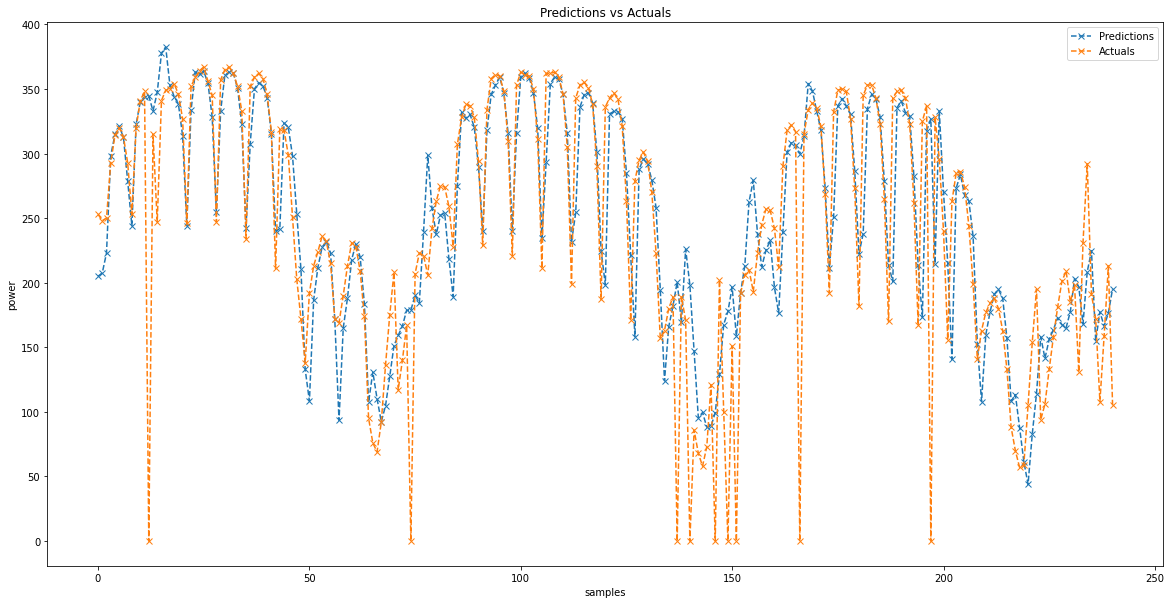

In [182]:
plot_predictions(model, X_test, y_test, start=0, end=240)


In [184]:
model.save("./forecasting_model/forecast_lstm.h5")


### Generate times, elevation and azimuth vectors to predict power for the rest of the day


In [27]:
future_azimuth = []
future_elevation = []
current_time = high_altitude_norm.index.values
current_time_last = current_time[-1]
current_time_last

# create a vector of dates from current_time_last to the hours 20:00 of the same day with a frequency of 5 seconds
future_time = pd.date_range(current_time_last, end="2016-11-23T20:00:00", freq="5S")


In [28]:
curr_azimuth = high_altitude["azimuth"]
period = np.unique(curr_azimuth[2361:2434])
period


array([  0,  18,  36,  54,  72,  90, 108, 126, 144, 162, 180])

In [80]:
to_repeat = []
for _, elem in enumerate(period):
    to_repeat += [elem] * 7

future_azimuth = np.tile(to_repeat, len(future_time) // len(to_repeat))


In [81]:
future_df = pd.DataFrame({"azimuth": future_azimuth})


In [82]:
future_time = future_time[: len(future_azimuth)]
len(future_time)


3696

In [83]:
future_df.index = future_time


In [84]:
future_df


,azimuth
2016-11-23 14:46:41,0
2016-11-23 14:46:46,0
2016-11-23 14:46:51,0
2016-11-23 14:46:56,0
2016-11-23 14:47:01,0
...,...
2016-11-23 19:54:16,180
2016-11-23 19:54:21,180
2016-11-23 19:54:26,180
2016-11-23 19:54:31,180


In [85]:
curr_elevation = high_altitude["elevation"]
curr_elevation


2016-11-23 09:45:05     0
2016-11-23 09:45:12    30
2016-11-23 09:45:15    45
2016-11-23 09:45:18    60
2016-11-23 09:45:21    75
                       ..
2016-11-23 14:46:27    90
2016-11-23 14:46:30     0
2016-11-23 14:46:35    15
2016-11-23 14:46:38    30
2016-11-23 14:46:41    45
Name: elevation, Length: 2459, dtype: int64

In [86]:
elevation_period = [0, 15, 30, 45, 60, 75, 90]
future_elevation = elevation_period * (future_df.shape[0] // len(elevation_period))
future_df["elevation"] = future_elevation


In [87]:
future_df


,azimuth,elevation
2016-11-23 14:46:41,0,0
2016-11-23 14:46:46,0,15
2016-11-23 14:46:51,0,30
2016-11-23 14:46:56,0,45
2016-11-23 14:47:01,0,60
...,...,...
2016-11-23 19:54:16,180,30
2016-11-23 19:54:21,180,45
2016-11-23 19:54:26,180,60
2016-11-23 19:54:31,180,75


In [88]:
future_df["hour"] = future_df.index.hour
future_df["minute"] = future_df.index.minute
future_df["second"] = future_df.index.second
future_df = future_df[["hour", "minute", "second", "azimuth", "elevation"]]


In [89]:
future_df


,hour,minute,second,azimuth,elevation
2016-11-23 14:46:41,14,46,41,0,0
2016-11-23 14:46:46,14,46,46,0,15
2016-11-23 14:46:51,14,46,51,0,30
2016-11-23 14:46:56,14,46,56,0,45
2016-11-23 14:47:01,14,47,1,0,60
...,...,...,...,...,...
2016-11-23 19:54:16,19,54,16,180,30
2016-11-23 19:54:21,19,54,21,180,45
2016-11-23 19:54:26,19,54,26,180,60
2016-11-23 19:54:31,19,54,31,180,75


In [90]:
def normalize(df):
    df_std = df.copy()
    for column in df_std.columns[:-1]:
        df_std[column] = df_std[column] / df_std[column].max()
    return df_std


In [91]:
# future_df = normalize(future_df)
future_df = future_df.iloc[1:, :]
future_df


,hour,minute,second,azimuth,elevation
2016-11-23 14:46:46,14,46,46,0,15
2016-11-23 14:46:51,14,46,51,0,30
2016-11-23 14:46:56,14,46,56,0,45
2016-11-23 14:47:01,14,47,1,0,60
2016-11-23 14:47:06,14,47,6,0,75
...,...,...,...,...,...
2016-11-23 19:54:16,19,54,16,180,30
2016-11-23 19:54:21,19,54,21,180,45
2016-11-23 19:54:26,19,54,26,180,60
2016-11-23 19:54:31,19,54,31,180,75


In [92]:
future_df


,hour,minute,second,azimuth,elevation
2016-11-23 14:46:46,14,46,46,0,15
2016-11-23 14:46:51,14,46,51,0,30
2016-11-23 14:46:56,14,46,56,0,45
2016-11-23 14:47:01,14,47,1,0,60
2016-11-23 14:47:06,14,47,6,0,75
...,...,...,...,...,...
2016-11-23 19:54:16,19,54,16,180,30
2016-11-23 19:54:21,19,54,21,180,45
2016-11-23 19:54:26,19,54,26,180,60
2016-11-23 19:54:31,19,54,31,180,75


In [93]:
high_altitude_norm.iloc[-5:, :]


,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:27,1.0,0.779661,0.457627,0.2,1.000000,172
2016-11-23 14:46:30,1.0,0.779661,0.508475,0.3,0.000000,108
2016-11-23 14:46:35,1.0,0.779661,0.593220,0.3,0.166667,159
2016-11-23 14:46:38,1.0,0.779661,0.644068,0.3,0.333333,213
2016-11-23 14:46:41,1.0,0.779661,0.694915,0.3,0.500000,105


In [94]:
final_df = pd.concat([high_altitude, future_df], axis=0)
final_df


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,9,45,5,0,0,32.0
2016-11-23 09:45:12,9,45,12,0,30,34.0
2016-11-23 09:45:15,9,45,15,0,45,35.0
2016-11-23 09:45:18,9,45,18,0,60,51.0
2016-11-23 09:45:21,9,45,21,0,75,76.0
...,...,...,...,...,...,...
2016-11-23 19:54:16,19,54,16,180,30,NaN
2016-11-23 19:54:21,19,54,21,180,45,NaN
2016-11-23 19:54:26,19,54,26,180,60,NaN
2016-11-23 19:54:31,19,54,31,180,75,NaN


In [95]:
final_df_norm = normalize(final_df)


In [96]:
final_df_norm


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,0.473684,0.762712,0.084746,0.0,0.000000,32.0
2016-11-23 09:45:12,0.473684,0.762712,0.203390,0.0,0.333333,34.0
2016-11-23 09:45:15,0.473684,0.762712,0.254237,0.0,0.500000,35.0
2016-11-23 09:45:18,0.473684,0.762712,0.305085,0.0,0.666667,51.0
2016-11-23 09:45:21,0.473684,0.762712,0.355932,0.0,0.833333,76.0
...,...,...,...,...,...,...
2016-11-23 19:54:16,1.000000,0.915254,0.271186,1.0,0.333333,NaN
2016-11-23 19:54:21,1.000000,0.915254,0.355932,1.0,0.500000,NaN
2016-11-23 19:54:26,1.000000,0.915254,0.440678,1.0,0.666667,NaN
2016-11-23 19:54:31,1.000000,0.915254,0.525424,1.0,0.833333,NaN


In [97]:
high_altitude_norm_correct = final_df_norm.iloc[: high_altitude.shape[0], :]
high_altitude_norm_correct


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,0.473684,0.762712,0.084746,0.0,0.000000,32.0
2016-11-23 09:45:12,0.473684,0.762712,0.203390,0.0,0.333333,34.0
2016-11-23 09:45:15,0.473684,0.762712,0.254237,0.0,0.500000,35.0
2016-11-23 09:45:18,0.473684,0.762712,0.305085,0.0,0.666667,51.0
2016-11-23 09:45:21,0.473684,0.762712,0.355932,0.0,0.833333,76.0
...,...,...,...,...,...,...
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0


In [98]:
high_altitude_norm_correct.to_csv("high_altitude_norm_correct.csv")


In [99]:
high_altitude_norm_correct


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,0.473684,0.762712,0.084746,0.0,0.000000,32.0
2016-11-23 09:45:12,0.473684,0.762712,0.203390,0.0,0.333333,34.0
2016-11-23 09:45:15,0.473684,0.762712,0.254237,0.0,0.500000,35.0
2016-11-23 09:45:18,0.473684,0.762712,0.305085,0.0,0.666667,51.0
2016-11-23 09:45:21,0.473684,0.762712,0.355932,0.0,0.833333,76.0
...,...,...,...,...,...,...
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0


- Add the part where the forecasting model predicts the power recursively
  - seleziona gli ultimi 'window_size' samples del vecchio df.
  -


## Forecast on high_altitude_norm_correct


In [124]:
def df_to_X_y(df, window_size=5, horizon=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    if (len(df_as_np) - window_size - horizon) == 0:
        row = [r for r in df_as_np[:window_size, :]]
        X.append(row)
        label = df_as_np[horizon + window_size][-1]
        y.append(label)
        return np.array(X), np.array(y)
    for i in range(len(df_as_np) - window_size - horizon):
        row = [r for r in df_as_np[i : i + window_size, :]]
        X.append(row)
        label = df_as_np[i + horizon + window_size][-1]
        y.append(label)
    return np.array(X), np.array(y)


In [125]:
X, y = df_to_X_y(high_altitude_norm_correct)


In [126]:
df_len = high_altitude_norm_correct.shape[0]
train = int(df_len * 0.7)
val = int(df_len * 0.9)
X_train, y_train = X[:train], y[:train]
X_val, y_val = X[train:val], y[train:val]
X_test, y_test = X[val:], y[val:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((1721, 5, 6), (1721,), (492, 5, 6), (492,), (240, 5, 6), (240,))

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(InputLayer((5, 6)))
model.add(LSTM(64))
model.add(Dense(8, "relu"))
model.add(Dense(1, "linear"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18176     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [128]:
optimizer = optimizers.Adam()
model.compile(loss="mae", optimizer=optimizer)


In [129]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)


Epoch 1/200


2022-07-15 11:04:25.315915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/54 [..............................] - ETA: 46s - loss: 227.6304

2022-07-15 11:04:25.560901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 11:04:25.642099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 2s 17ms/step - loss: 228.6261 - val_loss: 199.7900
Epoch 2/200
 1/54 [..............................] - ETA: 0s - loss: 241.2452

2022-07-15 11:04:26.439131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 11:04:26.502591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 13ms/step - loss: 224.9007 - val_loss: 193.8485
Epoch 3/200
54/54 [==============================] - 1s 14ms/step - loss: 218.3096 - val_loss: 185.8560
Epoch 4/200
54/54 [==============================] - 1s 10ms/step - loss: 208.3947 - val_loss: 173.7149
Epoch 5/200
54/54 [==============================] - 1s 11ms/step - loss: 194.6760 - val_loss: 159.7211
Epoch 6/200
54/54 [==============================] - 1s 10ms/step - loss: 180.7622 - val_loss: 145.4942
Epoch 7/200
54/54 [==============================] - 1s 10ms/step - loss: 166.3288 - val_loss: 130.5023
Epoch 8/200
54/54 [==============================] - 1s 10ms/step - loss: 152.2756 - val_loss: 116.5252
Epoch 9/200
54/54 [==============================] - 1s 11ms/step - loss: 139.3994 - val_loss: 104.7589
Epoch 10/200
54/54 [==============================] - 1s 13ms/step - loss: 128.2338 - val_loss: 96.9535
Epoch 11/200
54/54 [==============================] - 1s 14ms/step - loss: 1

In [130]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={"Predictions": predictions, "Ground Truth": y})
    df.plot(figsize=(20, 10), marker="x", linestyle="--", xlabel="samples", ylabel="power", title="Predictions vs Actuals")
    return df


2022-07-15 11:06:20.555441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 11:06:20.627724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


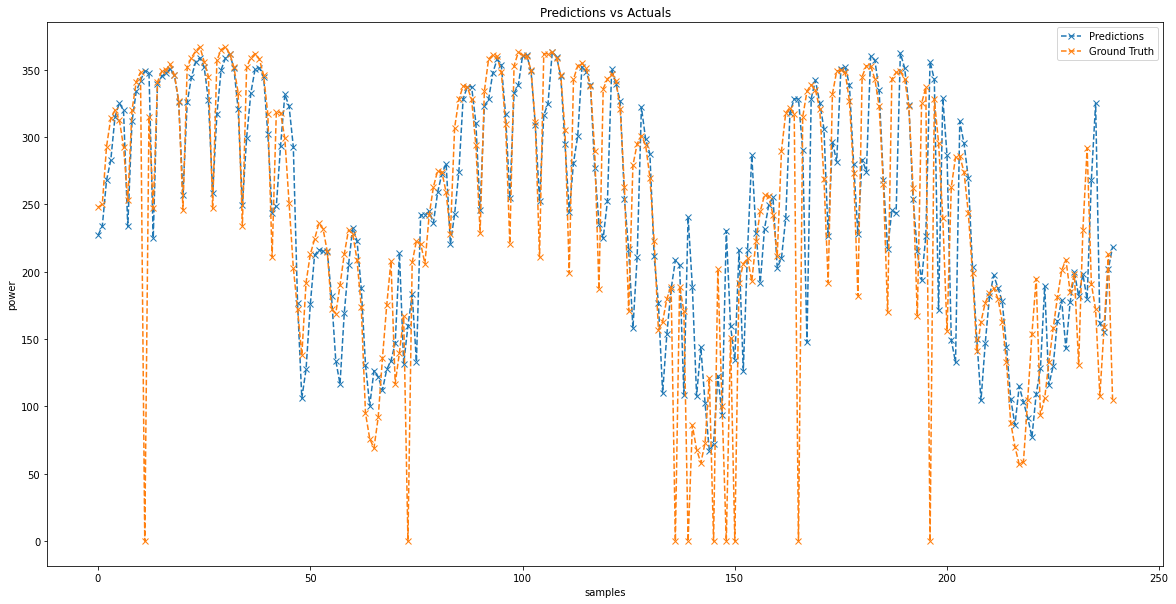

In [131]:
results = plot_predictions(model, X_test, y_test, start=0, end=240)


In [139]:
print(results["Predictions"].mean())
print(results["Ground Truth"].mean())
print(results["Predictions"].mean() - results["Ground Truth"].mean())


246.61104
245.27083333333334
1.3402048746744697


In [140]:
model.save("./forecasting_model/forecast_lstm_norm_correct.h5")


- use the trained model to predict power for the future dataset


In [141]:
high_altitude_norm_correct


,hour,minute,second,azimuth,elevation,power
2016-11-23 09:45:05,0.473684,0.762712,0.084746,0.0,0.000000,32.0
2016-11-23 09:45:12,0.473684,0.762712,0.203390,0.0,0.333333,34.0
2016-11-23 09:45:15,0.473684,0.762712,0.254237,0.0,0.500000,35.0
2016-11-23 09:45:18,0.473684,0.762712,0.305085,0.0,0.666667,51.0
2016-11-23 09:45:21,0.473684,0.762712,0.355932,0.0,0.833333,76.0
...,...,...,...,...,...,...
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0


In [146]:
def df_to_X(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    if (len(df_as_np) - window_size) == 0:
        row = [r for r in df_as_np[:window_size, :]]
        X.append(row)
        return np.array(X)
        
    for i in range(len(df_as_np) - window_size - 1):
        row = [r for r in df_as_np[i : i + window_size, :]]
        X.append(row)
    return np.array(X)


In [ ]:
high_altitude_norm_correcth

In [155]:
last_ground_truth = high_altitude_norm_correct.iloc[-5:, :]
last_ground_truth


,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0
2016-11-23 14:46:41,0.736842,0.779661,0.694915,0.3,0.500000,105.0


In [169]:
trial_x = df_to_X(last_ground_truth)

In [171]:
trial_x

array([[[7.36842105e-01, 7.79661017e-01, 4.57627119e-01, 2.00000000e-01,
         1.00000000e+00, 1.72000000e+02],
        [7.36842105e-01, 7.79661017e-01, 5.08474576e-01, 3.00000000e-01,
         0.00000000e+00, 1.08000000e+02],
        [7.36842105e-01, 7.79661017e-01, 5.93220339e-01, 3.00000000e-01,
         1.66666667e-01, 1.59000000e+02],
        [7.36842105e-01, 7.79661017e-01, 6.44067797e-01, 3.00000000e-01,
         3.33333333e-01, 2.13000000e+02],
        [7.36842105e-01, 7.79661017e-01, 6.94915254e-01, 3.00000000e-01,
         5.00000000e-01, 1.05000000e+02]]])

In [172]:
model.predict(trial_x)

array([[130.48595]], dtype=float32)

In [148]:
model = tf.keras.models.load_model("./forecasting_model/forecast_lstm_norm_correct.h5")


In [156]:
forecast = model.predict(df_to_X(last_ground_truth))  # questo risultato lo devo mettere in df_future[window+1,-1]
# dopo di che scalo di uno in avanti e faccio il predict sulla window successiva

int(forecast[0][0])

130

In [160]:
final_df = pd.concat([last_ground_truth, final_df_norm[high_altitude.shape[0] :]], axis=0)
final_df.head(20)


,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0
2016-11-23 14:46:41,0.736842,0.779661,0.694915,0.3,0.500000,105.0
2016-11-23 14:46:46,0.736842,0.779661,0.779661,0.0,0.166667,NaN
2016-11-23 14:46:51,0.736842,0.779661,0.864407,0.0,0.333333,NaN
2016-11-23 14:46:56,0.736842,0.779661,0.949153,0.0,0.500000,NaN
2016-11-23 14:47:01,0.736842,0.796610,0.016949,0.0,0.666667,NaN
2016-11-23 14:47:06,0.736842,0.796610,0.101695,0.0,0.833333,NaN


In [161]:
final_df.to_csv("final_df_for_forecasting.csv")


In [197]:
final_df = pd.read_csv("final_df_for_forecasting.csv", index_col=0)
final_df


,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0
2016-11-23 14:46:41,0.736842,0.779661,0.694915,0.3,0.500000,105.0
...,...,...,...,...,...,...
2016-11-23 19:54:16,1.000000,0.915254,0.271186,1.0,0.333333,NaN
2016-11-23 19:54:21,1.000000,0.915254,0.355932,1.0,0.500000,NaN
2016-11-23 19:54:26,1.000000,0.915254,0.440678,1.0,0.666667,NaN
2016-11-23 19:54:31,1.000000,0.915254,0.525424,1.0,0.833333,NaN


In [303]:
def forecast(df, model, window_size=5):
  forecasted_df = df.copy()
  for i in range(len(forecasted_df) - window_size):
    window = np.expand_dims(forecasted_df.iloc[i:i+window_size, :].to_numpy(), axis=0)
    # print(window)
    pred = int(model.predict(window)[0][0])
    forecasted_df.iat[i+window_size, 5] = pred
  return forecasted_df


In [295]:
final_df.iloc[1:1+5, :]

,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0
2016-11-23 14:46:41,0.736842,0.779661,0.694915,0.3,0.500000,105.0
2016-11-23 14:46:46,0.736842,0.779661,0.779661,0.0,0.166667,NaN


In [296]:
window = np.expand_dims(final_df.iloc[0:0+5, :].to_numpy(), axis=0)


model.predict(window)

array([[130.486]], dtype=float32)

In [270]:
model.predict(np.expand_dims(final_df.iloc[0:0+5, :].to_numpy(), axis=0))

array([[130.486]], dtype=float32)

In [304]:
forecasted_df = forecast(final_df, model)
forecasted_df

,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0
2016-11-23 14:46:41,0.736842,0.779661,0.694915,0.3,0.500000,105.0
...,...,...,...,...,...,...
2016-11-23 19:54:16,1.000000,0.915254,0.271186,1.0,0.333333,222.0
2016-11-23 19:54:21,1.000000,0.915254,0.355932,1.0,0.500000,291.0
2016-11-23 19:54:26,1.000000,0.915254,0.440678,1.0,0.666667,300.0
2016-11-23 19:54:31,1.000000,0.915254,0.525424,1.0,0.833333,272.0


<AxesSubplot:>

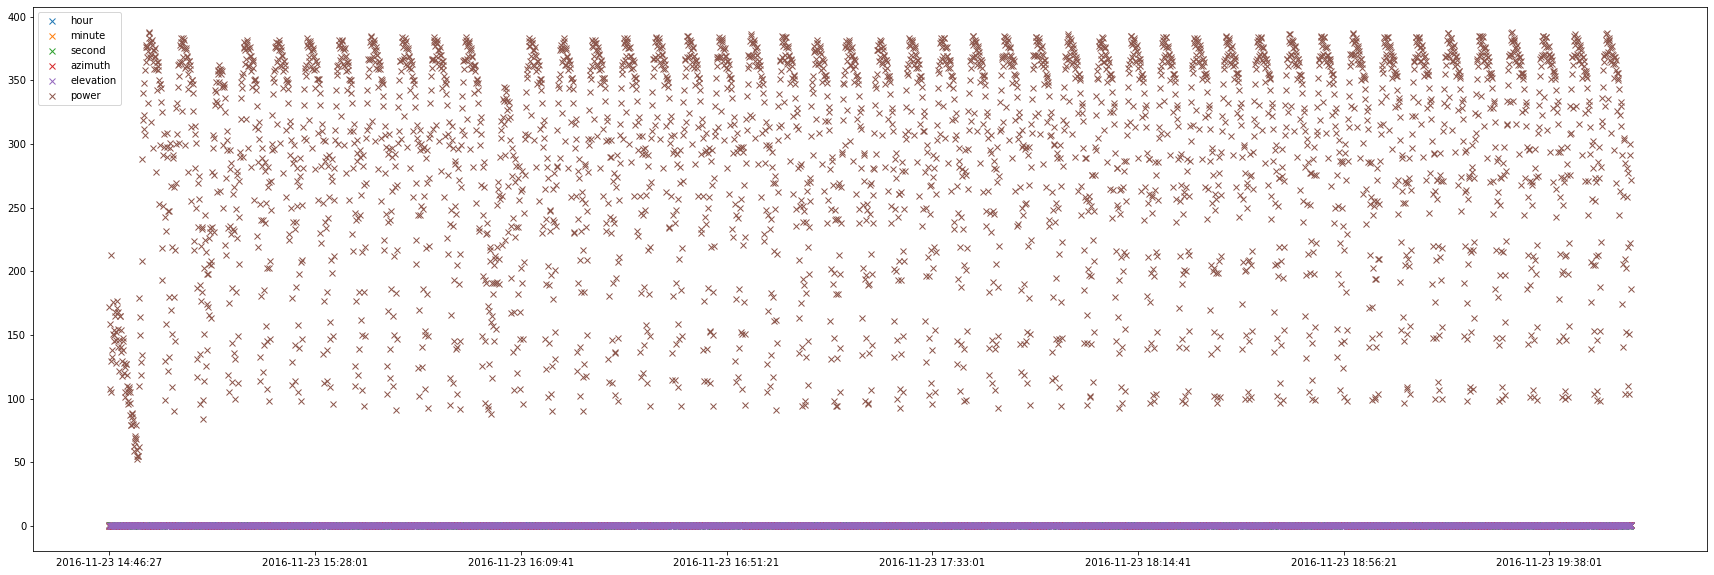

In [312]:
forecasted_df.plot(figsize=(30,10), marker='x', linewidth=.5, linestyle='None')

In [305]:
forecasted_df.head(20)

,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:27,0.736842,0.779661,0.457627,0.2,1.000000,172.0
2016-11-23 14:46:30,0.736842,0.779661,0.508475,0.3,0.000000,108.0
2016-11-23 14:46:35,0.736842,0.779661,0.593220,0.3,0.166667,159.0
2016-11-23 14:46:38,0.736842,0.779661,0.644068,0.3,0.333333,213.0
2016-11-23 14:46:41,0.736842,0.779661,0.694915,0.3,0.500000,105.0
2016-11-23 14:46:46,0.736842,0.779661,0.779661,0.0,0.166667,130.0
2016-11-23 14:46:51,0.736842,0.779661,0.864407,0.0,0.333333,133.0
2016-11-23 14:46:56,0.736842,0.779661,0.949153,0.0,0.500000,138.0
2016-11-23 14:47:01,0.736842,0.796610,0.016949,0.0,0.666667,176.0
2016-11-23 14:47:06,0.736842,0.796610,0.101695,0.0,0.833333,151.0


In [291]:
forecasted_df[forecasted_df['power'].isna()]

,hour,minute,second,azimuth,elevation,power
2016-11-23 14:46:46,0.736842,0.779661,0.779661,0.0,0.166667,NaN


In [ ]:
preds = []
with np.printoptions(precision=3, suppress=True):
  for i, window in enumerate(windowed_final_df[:-1]):
    pred_power = int(model.predict(window.reshape(1, 5, 6))[0][0])
    preds.append(pred_power)
    print(pred_power)
    windowed_final_df[i+1][-1][-1] = pred_power

In [195]:
with np.printoptions(precision=3, suppress=True):
  print(windowed_final_df)

[[[  0.737   0.78    0.458   0.2     1.    172.   ]
  [  0.737   0.78    0.508   0.3     0.    108.   ]
  [  0.737   0.78    0.593   0.3     0.167 159.   ]
  [  0.737   0.78    0.644   0.3     0.333 213.   ]
  [  0.737   0.78    0.695   0.3     0.5   105.   ]]

 [[  0.737   0.78    0.508   0.3     0.    108.   ]
  [  0.737   0.78    0.593   0.3     0.167 159.   ]
  [  0.737   0.78    0.644   0.3     0.333 213.   ]
  [  0.737   0.78    0.695   0.3     0.5   105.   ]
  [  0.737   0.78    0.78    0.      0.167 130.   ]]

 [[  0.737   0.78    0.593   0.3     0.167 159.   ]
  [  0.737   0.78    0.644   0.3     0.333 213.   ]
  [  0.737   0.78    0.695   0.3     0.5   105.   ]
  [  0.737   0.78    0.78    0.      0.167     nan]
  [  0.737   0.78    0.864   0.      0.333 133.   ]]

 ...

 [[  1.      0.898   0.949   0.9     0.833     nan]
  [  1.      0.915   0.017   0.9     1.        nan]
  [  1.      0.915   0.102   1.      0.        nan]
  [  1.      0.915   0.186   1.      0.167     nan]
